In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#import all necessary  libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#loading data and cleaning it

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/YT_Videos_Comments.csv')


In [ ]:
df.describe()

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
count,379528,379379,379366,379366,379351,379081,379053,379094,379100
unique,227,434,405,409,367141,366855,246542,263093,376361
top,Physics Girl,Why This Stuff Costs $2700 Trillion Per Gram -...,Physics Girl is on Patreon! ►► https://www.pat...,PCuyCJocJWg,Thanks!,Thanks!,anil sharma,UCm094d2rj0ATxj3WH5pWfrw,2022-12-21T15:44:29Z
freq,268031,14216,14216,14216,353,353,183,183,6


In [ ]:
df.shape

(379528, 9)

In [ ]:
#handinling the null values fillling the null values according to mode

# Check for null values in the data frame
if df.isnull().values.any():
    df = df.fillna(df.mode().iloc[0])

In [ ]:
df.isnull().sum()

User                         0
Video Title                  0
Video Description            0
Video ID                     0
Comment (Displayed)          0
Comment (Actual)             0
Comment Author               0
Comment Author Channel ID    0
Comment Time                 0
dtype: int64

In [ ]:
#dropping the uncessary columns like user id ,video id, comment author id...

df=df.drop(["User","Video ID" ,"Comment Time","Comment Author Channel ID"],axis='columns')

In [ ]:
df['Comment (Actual)'] = df['Comment (Actual)'].astype(str)
df['Comment (Displayed)'] = df['Comment (Displayed)'] .astype(str)

In [ ]:
# removing the stopping word

stop_words = set(stopwords.words('english'))

def filter(text):

    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(words)
    return text


df['Comment (Displayed)'] = df['Comment (Displayed)'].apply(filter)
df['Comment (Actual)'] = df['Comment (Actual)'].apply(filter)
df['Video Description'] = df['Video Description'].apply(filter)
df['Video Title'] = df['Video Title'].apply(filter)

In [ ]:
df.head()

,Video Title,Video Description,Comment (Displayed),Comment (Actual),Comment Author
0,"Robots made spiders (yes, really)",I'M SORRY OK. fascinating. Scientists made rob...,zombie spider!! bomb damn lab it&#39;s late!!,zombie spider!! bomb damn lab late!!,Bagus Hutomo
1,"Robots made spiders (yes, really)",I'M SORRY OK. fascinating. Scientists made rob...,"way less cool seems, spiders actually muscles ...","way less cool seems, spiders actually muscles ...",CMZ neu
2,"Robots made spiders (yes, really)",I'M SORRY OK. fascinating. Scientists made rob...,"Spiders see made terrifying go again, poking p...","Spiders see made terrifying go again, poking p...",Kiana Marrie
3,"Robots made spiders (yes, really)",I'M SORRY OK. fascinating. Scientists made rob...,looks pretty 😍,looks pretty 😍,Noob
4,"Robots made spiders (yes, really)",I'M SORRY OK. fascinating. Scientists made rob...,hear hairs standing wife’s arms mile away.,hear hairs standing wife’s arms mile away.,chancellor9000


In [ ]:
df.shape

(379528, 5)

In [ ]:
# Vectorize data
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Comment (Actual)'])


In [ ]:
tfidf_matrix.shape

(379528, 119691)

In [ ]:
#reducing the dimension of the spare matrix

tsvd = TruncatedSVD(n_components=2)
X_sparse_tsvd = tsvd.fit(tfidf_matrix).transform(tfidf_matrix)


In [ ]:
X_sparse_tsvd.shape

(379528, 2)

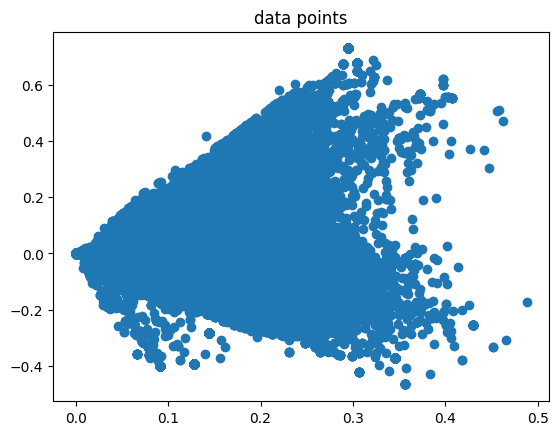

In [ ]:
# Plot the lower-dimensional representation
plt.scatter(X_sparse_tsvd[:, 0], X_sparse_tsvd[:, 1])
plt.title("data points")
plt.show()

#by author

In [ ]:
author_counts = df['Comment Author'].value_counts()
spam_authors = author_counts[author_counts > 15].index

#0 ---------> not spam 
#1----------> spam

df["by Author"] = df['Comment Author'].apply(lambda author: '1' if author in spam_authors else '0')
# df

In [ ]:
authr=df[df["by Author"]=='1']
authr_not=df[df["by Author"]=='0']

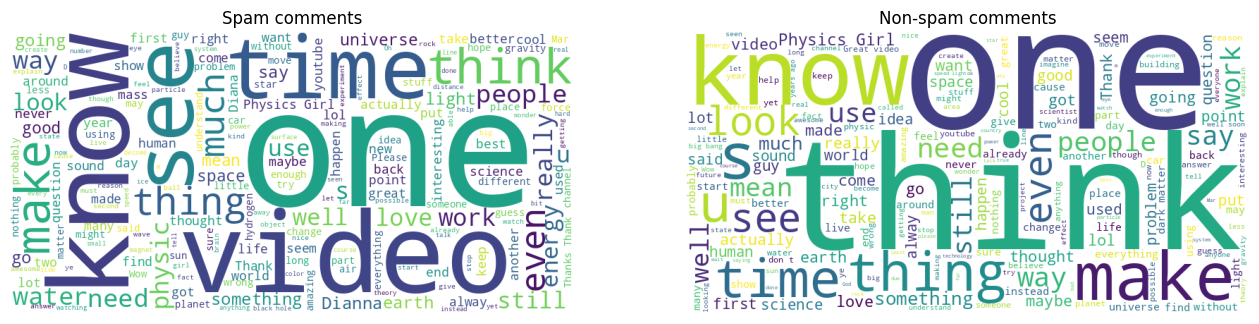

In [ ]:


# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(authr['Comment (Actual)']))
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(authr_not['Comment (Actual)']))

# Visualize word clouds
fig, ax = plt.subplots(1, 2,figsize=(16, 8))
ax[0].imshow(spam_wordcloud)
ax[0].set_title('Spam comments')
ax[0].axis('off')
ax[1].imshow(non_spam_wordcloud)
ax[1].set_title('Non-spam comments')
ax[1].axis('off')
plt.show()


In [ ]:
#have to be done

# multiple links and promotional ones

In [ ]:
import re

def is_spam(comment):

    words  = comment.split()

    # Check for promotional content
    if re.search('(\s|^)http(s)?://', comment):
        return  "1"
    

    
    # Check for excessive use of capital letters
    if sum(1 for c in comment if c.isupper()) > len(comment) //2:
        return 1
    
    # Check for common spam words or phrases
    spam_words = ['free', 'discount', 'sale', 'limited time', 'work from home','act now', 'Click here', 'earn money', 'cash', 'Urgent', 'Guarantee',
                'Opportunity', 'Save', 'Winner', 'Viagra', 'Cialis', 'Get rich quick', 'Investment', 'Loan', 'Debt', 'Credit score',
                'Refinance', 'Home based', 'Work from home', 'MLM', 'Multi-level marketing', 'Herbal', 'Weight loss', 'Diet', 'Miracle', 
                'Secret', 'Unbelievable', 'Amazing', 'Incredible', 'Make money fast', 'No credit check', 'No cost', 'No obligation',
                'Pre-approved', 'Millionaire', 'Billionaire', 'Fast cash', 'Easy money', 'Cash bonus', 'Double your money', 'Instant',
                'Success', 'Opportunity of a lifetime', 'Risk-free', 'Best price','Discount', "off", 'Money-back guarantee','Limited time offer','Save big']

    # if (word.lower() in comment.lower() for word in spam_words).count>5:
    #     return 1

    return 0
df["conditions"] = df["Comment (Actual)"].apply(is_spam)

In [ ]:
spam=df[df["conditions"] ==1]
not_spam=df[df["conditions"]  ==0]


In [ ]:
spam

,Video Title,Video Description,Comment (Displayed),Comment (Actual),Comment Author,conditions
26,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,👆The CLAAAAAWWWW!!!,👆The CLAAAAAWWWW!!!,defenestrated23,1
56,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,NO!,NO!,Nobody Cares,1
213,The REAL Cure for Cancer,What people get wrong about cancer.\nInterview...,CLICK BAIT! AVOID!,CLICK BAIT! AVOID!,Chris Topher,1
237,The REAL Cure for Cancer,What people get wrong about cancer.\nInterview...,MUSHROOMS,MUSHROOMS,wez,1
251,The REAL Cure for Cancer,What people get wrong about cancer.\nInterview...,IF YOU ARE SCREENING DO YOUR BEST TO DO SOMETH...,SCREENING BEST SOMETHING INVOLVE RADIATION. LI...,Federico Vallin,1
...,...,...,...,...,...,...
378966,Spaceships pushed by LIGHT – the future of spa...,This episode is brought to you by Squarespace:...,NERD,NERD,Sami Cold,1
379202,Spaceships pushed by LIGHT – the future of spa...,This episode is brought to you by Squarespace:...,PLANETARY SOCIETY,PLANETARY SOCIETY,Theo Detweiler,1
379389,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,YOU HAVE TO MAKE MORE VIDEOS!!<br>PLEASE,MAKE VIDEOS!! PLEASE,Dorian Noriega,1
379467,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,YOUR HOTTT AND SMARTTT,HOTTT SMARTTT,Brock Obama,1


In [ ]:
not_spam

,Video Title,Video Description,Comment (Displayed),Comment (Actual),Comment Author,conditions
0,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb damn lab late!!,Bagus Hutomo,0
1,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,"This is way less cool than it seems, spiders a...","way less cool seems, spiders actually muscles ...",CMZ neu,0
2,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,Spiders see this and this is why they made the...,"Spiders see made terrifying go again, poking p...",Kiana Marrie,0
3,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,you looks pretty 😍,looks pretty 😍,Noob,0
4,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,I can hear the hairs standing up on my wife’s ...,hear hairs standing wife’s arms mile away.,chancellor9000,0
...,...,...,...,...,...,...
379523,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,"hey girl,make more vdos and make it lengthy .....","hey girl,make vdos make lengthy .......really ...",Omkar Bhambure,0
379524,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,Third,Third,Izzo Mapping,0
379525,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,third,third,Indecisive,0
379526,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,Second,Second,Nathan,0


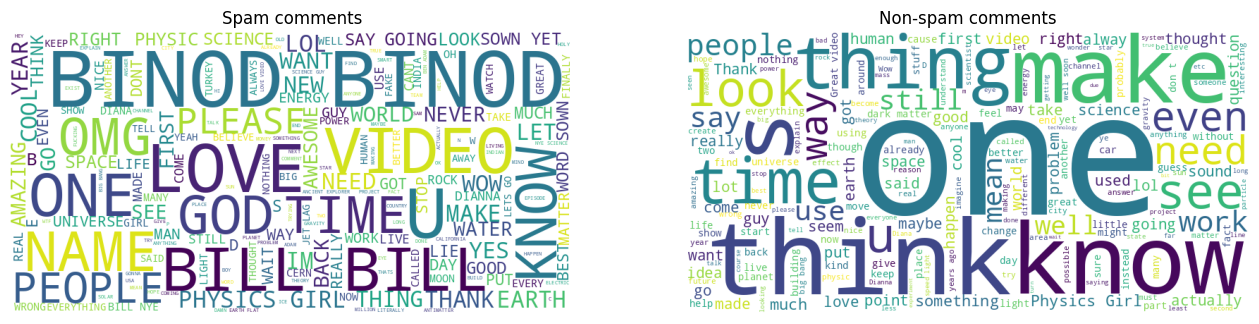

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam['Comment (Actual)']))
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(not_spam['Comment (Actual)']))

# Visualize word clouds
fig, ax = plt.subplots(1, 2,figsize=(16, 8))
ax[0].imshow(spam_wordcloud)
ax[0].set_title('Spam comments')
ax[0].axis('off')
ax[1].imshow(non_spam_wordcloud)
ax[1].set_title('Non-spam comments')
ax[1].axis('off')
plt.show()


# By performing the KMeans

In [ ]:
#normalizing data by standardscaler 
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_sparse_tsvd)

In [ ]:
# Perform clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_normalized)
labels = kmeans.labels_ 


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


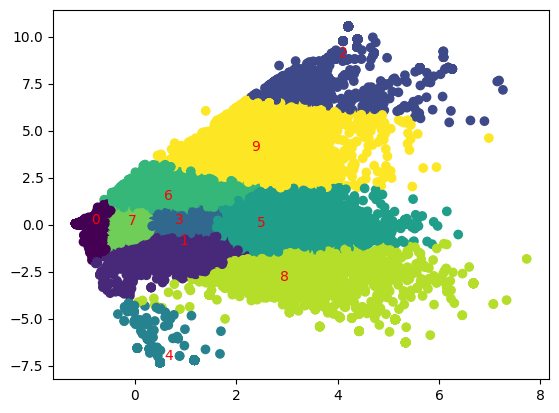

In [ ]:
#plotting the kmeans clusters

plt.scatter(X_normalized[:,0], X_normalized[: ,1] , c=kmeans.labels_)
centers = kmeans.cluster_centers_
for i, center in enumerate(centers):
    plt.text(center[0], center[1], str(i), fontsize=10, color='red')
plt.show()

In [ ]:
labels = kmeans.labels_
df['cluster'] = labels
cluster_counts = df['cluster'].value_counts()
cluster_counts

0    141742
7    119133
3     54098
1     22021
6     16634
5     14841
8      5013
9      2965
4      1621
2      1460
Name: cluster, dtype: int64

In [ ]:
cluster_counts=cluster_counts.to_numpy()

clusters_list=np.array([7,0,9,4,2,1,8,5,6,3])

In [ ]:
type(clusters_list)

numpy.ndarray

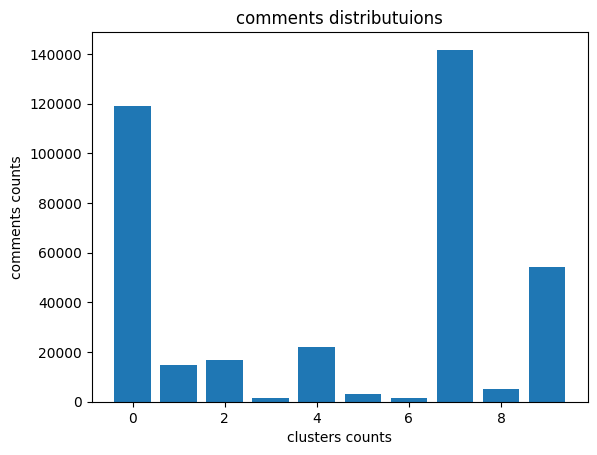

In [ ]:
#plotting the clusters count

plt.bar(clusters_list,cluster_counts)
plt.title("comments distributuions")
plt.xlabel("clusters counts")
plt.ylabel("comments counts")
plt.show()

In [ ]:
cluster1=df[df['cluster'] == 1]
cluster2=df[df['cluster'] == 2]
cluster3=df[df['cluster'] == 3]
cluster4=df[df['cluster'] == 4]
cluster5=df[df['cluster'] == 5]
cluster6=df[df['cluster'] == 6]
cluster7=df[df['cluster'] == 7]
cluster8=df[df['cluster'] == 8]
cluster9=df[df['cluster'] == 9]
cluster10=df[df['cluster'] == 0]

In [ ]:
cluster1["Comment (Actual)"].head(10)

41     used like Cleo. thought, nice girl. great stor...
55                                      Thanks, hate it.
63     see what's wrong this. Australian might someth...
80                                             Awesome 🔥
99                  Hey look, found beginning end things
106                                           Great! lol
177    cover cures cancer get lot press, “prevention”...
183                       quality video call noticeable.
229    Great story. like put together. lot great ques...
241    Always enjoy stories. ab break surprisingly in...
Name: Comment (Actual), dtype: object

In [ ]:
cluster2["Comment (Actual)"].head(20)

111293    Get well soon Dianna. Everyone would love see ...
111298                                       get well soon!
111302                  hope get well soon. love Diana 🇦🇿🇦🇿
111324                    Get well soon 💓❤️... Love India 💟
111328                                        get well soon
111333                                        Get well soon
111361                                 Get well soon Dianna
111371                              Get well soon Diana ❤️.
111372                                Get well soon, friend
111424                    Wish good health get well soon. 🙏
111436                                Get well soon please!
111453                                        Get well soon
111471       Wishing best Dianna. Please, get well soon. ❤️
111487           Best wishes family, hope get well soon! <3
111495         Get well soon, love content hope back ready.
111497                           hope get well really soon.
111551                                  

In [ ]:
cluster3["Comment (Actual)"].head(10)

5                  love science, that's massive nope me.
19                            one women could listen day
30     needed thinking behind would sound cool let's ...
37                                             love hate
42     stumbled apon channel, holy damn great! Sideno...
53     need apologetic! Biomimetic engineering really...
59     create kind reverse shrink ray make bigger usa...
69     Please bring content spiders. love arachnids. ...
90     Im reading children time rn feel like gonna co...
115    really understand argument getting regular che...
Name: Comment (Actual), dtype: object

In [ ]:
cluster4["Comment (Actual)"].head(20)

5287     Waffle House found it’s new host
5441          waffle house found new host
5484          waffle House found new host
5485          waffle house found new host
5828         waffle house found new host.
7080                waffle house new host
7099          waffle house found new host
7217          waffle house found new host
7245          waffle House found new host
7296          waffle house found new host
7300         waffle house found new host.
7312          waffle house found new host
7323          Waffle House Found New Host
7334           wafle house found new host
7356    Waffle House found it’s new host.
7366     Waffle House found it’s new host
7378          waffle House found new host
7384     Waffle House found it’s new host
7390         Waffle House found new host.
7393         Waffle House found new host.
Name: Comment (Actual), dtype: object

In [ ]:
cluster5["Comment (Actual)"].head(20)

74                                                  love
244    great interesting video. i'm curious, much pro...
283    Amazing video!! Though wish would’ve spent tim...
305    friend treated Budwig Clinic south Spain well,...
346    Could someone tell make video like this?? goes...
383    first video watch, give sincere compliments, t...
400    like envisage cancer cells normal cells got la...
402    Wow, love videos. cancer video even close leve...
411    kind can't start "What people get wrong cancer...
498    excellent reporting, accurate doctors explain ...
529    one's interesting me. father passed 2017 brain...
553    Okay, lemme give crash course cancer. Firstly,...
614    Kinda baffled don’t think obvious thing looked...
650    love clear way explaining visualizing things! ...
666    physician’s perspective here: much appreciate ...
738                                        Love videos ❤
741       Cleo amazing, love channel. Give thumbs please
743    well done. glad woman vi

In [ ]:
cluster6["Comment (Actual)"].head(10)

16     thought myself, "Wow. could watch Cleo talk AN...
32                Well.. wanna follow beautiful smile 😋.
113    Look you’re taking get rid cancer. Stop eating...
142    Amazing episode. father died cancer, doctors f...
162                               get buccal fat removal
191    Fasting. Cancer much growth, fat insulin resis...
214    *spends day sitting, eats plastic, get enough ...
258    pretty much skip over-diagnosis problem dismis...
260    Yeah lets put faith medical industrial complex...
271    mention low income people can't access cancer ...
Name: Comment (Actual), dtype: object

In [ ]:
cluster7["Comment (Actual)"].head(20)

1     way less cool seems, spiders actually muscles ...
2     Spiders see made terrifying go again, poking p...
3                                        looks pretty 😍
6                        arcade machines australia like
9                       Wow! That's cool! I'm sarcastic
10    mean look like something B slock sci fi movie ...
14                               Biological robots cool
15                                             good job
27    best/worst part name given new branch robotics...
29                         shit Cave Johnson would come
31            Cleo brings interesting info bombs always
33      Actually, I'm subscribing want see dead spiders
36                    Time make big spider small spider
39                              awesome horrifying time
45    use dead spiders instead recreating something ...
51                         Fascinating horrifying time.
58    sounds intelligent. born knowledge attracted p...
60    spider scientist 10 years took two days sa

In [ ]:
cluster8["Comment (Actual)"].head(10)

169                       gorgeous smart, great video :D
210                                          Great video
232          Another great video Cleo! learn lot videos.
250    Cleo hello, liked video looks like lot HARD & ...
295                             Thank much making video.
353                                               Thanks
406    Thanks video cancer cure. also make video poss...
477                         video informative people see
676                                          Great video
682                     love VOX style video. Great job!
Name: Comment (Actual), dtype: object

In [ ]:
cluster9["Comment (Actual)"].head(10)

249                                           get nothing.
2318                             Anything get 💉💉 😂😆😂 🤡🤡🤡🤡🤡
4800                                            Well done!
5152                                  Wow really well put.
6596     well, humans made chart like us would curved well
7779                                          well, second
9027     fuckin ai coming get us man keep entertaining ...
9186                                                   get
9247                                             Get plane
10904                                 Well, I'll job soon.
Name: Comment (Actual), dtype: object

In [ ]:
cluster10["Comment (Actual)"].head(10)

0                  zombie spider!! bomb damn lab late!!
4            hear hairs standing wife’s arms mile away.
7                                       I'm sorry what?
8                (in Australia looking up): “Ooo Claw!”
11    Kinda reminds episode code lyoko spiders contr...
12                             8 DoF Gripper ! Noice 👍🏻
13    I'm hearing... need breed bigger spiders male ...
17                           Zombie Robot Spider 2023 😂
18    Wake babe new horrific state consciousness fro...
20                            Never show Jordan Howlett
Name: Comment (Actual), dtype: object

By observing the above comments we can see the comments in cluster 7 and  6 contians so much spam comments compare to others

In [ ]:
spam_cluster=[7,6]
non_spam_cluster=[0,9,8,5,3,4,2,1]

In [ ]:
# classifing the comment's 

labels = kmeans.labels_
df['cluster'] = labels
cluster_counts = df['cluster'].value_counts()

for i in spam_cluster:
    spam_comments = df[df['cluster'] == i]

for i in non_spam_cluster:
    non_spam_comments = df[df['cluster'] == i]


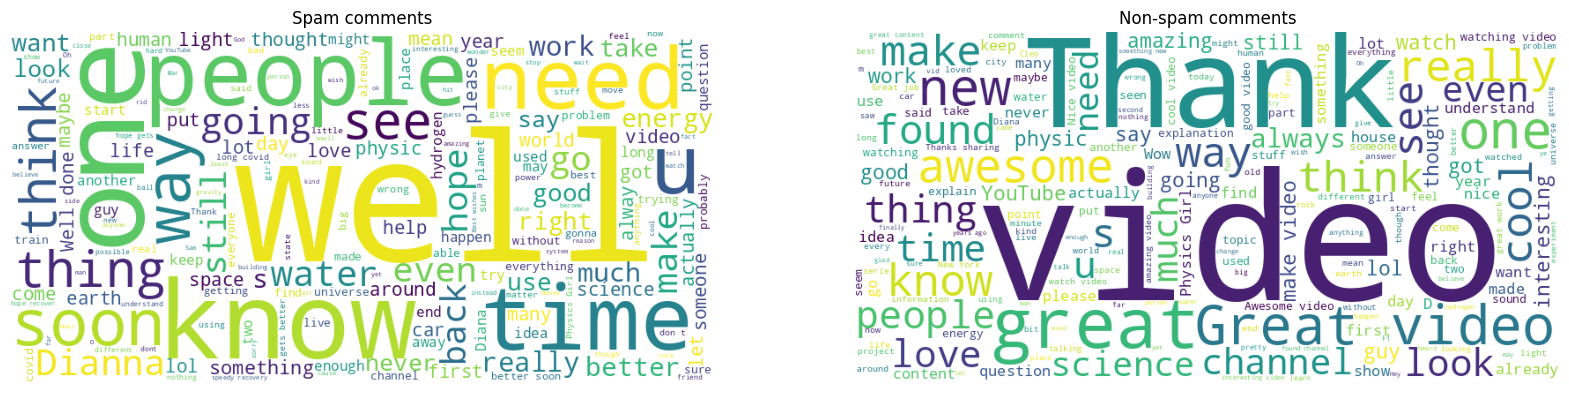

In [ ]:


# Create word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_comments['Comment (Actual)']))
non_spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(non_spam_comments['Comment (Actual)']))



# Visualize word clouds
fig, ax = plt.subplots(1, 2,figsize=(20, 10))
ax[0].imshow(spam_wordcloud)
ax[0].set_title('Spam comments')
ax[0].axis('off')
ax[1].imshow(non_spam_wordcloud)
ax[1].set_title('Non-spam comments')
ax[1].axis('off')
plt.show()


In [ ]:
#evaluating the model 

score = silhouette_score(X_normalized, kmeans.labels_)
print("The silhouette score is:", score)

The silhouette score is: 0.4739029583073459


#Conclusion

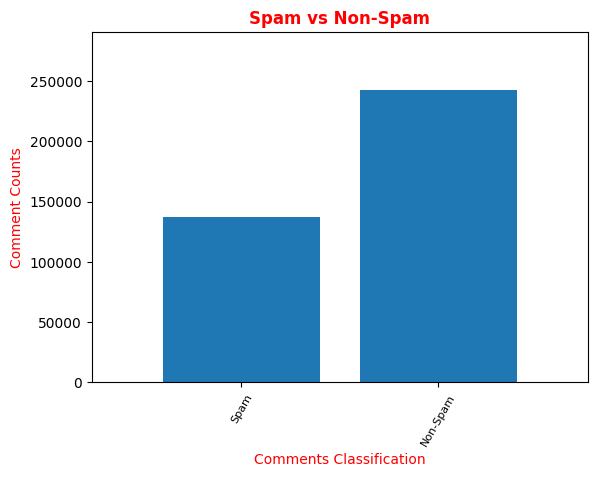

In [ ]:
y=[137367 ,242161] # adding the commetns comments of the spam and non-spam using the above clusters
x=[0,1]
labels = ["Spam","Non-Spam"]

plt.bar(x,y)
plt.xticks(x, labels, rotation =60,fontsize=8)
plt.title("Spam vs Non-Spam",fontweight="bold",color='red')
plt.xlabel("Comments Classification",color='red')
plt.ylabel("Comment Counts",color='red')
plt.subplots_adjust(bottom = 0.15)
plt.margins(0.2)